## 02 Neural Network classification with pytorch
Classsification is a poblem of predicting wether something is one thing or another (there can be a multiple things as the options). 

1. MAKE CLASSIFICTAION DATA AND GET IT READY

In [85]:
import sklearn


In [86]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [87]:
len(X), len(y)

(1000, 1000)

In [88]:
print(f"First 5 Samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 Samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [89]:
# Make Dataframe of Circle data
import pandas as pd  
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [90]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

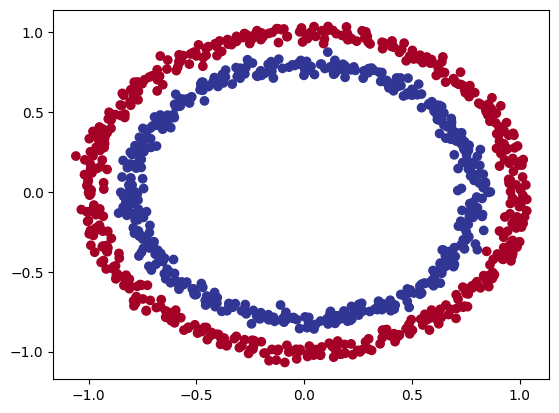

In [91]:
# VISUALIZE VISUALIZE, VISUALIZE
import matplotlib.pyplot as plt
plt.scatter (x=X[:, 0],
             y=X[:, 1],
             c=y,
             cmap=plt.cm.RdYlBu)

** NOTE : The date we're working with is often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

In [92]:
X.shape, y.shape

((1000, 2), (1000,))

In [93]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [94]:
# view the first example of featires and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X:{X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for  y: {y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for  y: ()


1.2 Turning data into tensor and create train and test splits

In [95]:
 # Turn data into tensor
import torch

In [96]:
# turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [97]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [98]:
torch.manual_seed(42)

In [99]:
# split data into  training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)
 

In [100]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [101]:
n_samples

1000

** 2. BUILDING A MODEL
Lets build a model to classify our blue and red dots
to do so, we want to:
1. setup device agonistic code so our code will run on an accelerator (GPU) if there is one 
2. construct a model(by subclassing nn.module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [102]:
# import pytorch and nn
import torch
from torch import nn

# make device agnostic nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [103]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

NOW WE'VE SETUP DIVICE AGNOSTIC CODE, LETS CREATE A MODEL THAT:
1. subclasses nn. Module (almost all models in pytorch subclass nn.module)
2. Create 2 nn.linear() layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines the forward pass (or forward computation) of the model 
4. Instatiate and instance of our model class and send it to the target device 

In [104]:
X_train.shape

torch.Size([800, 2])

In [105]:
import torch
from torch import nn

# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)  # takes in 2 features and outputs 5
        self.layer_2 = nn.Linear(in_features=5, out_features=1)  # takes in 5 features and outputs 1

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, X):
        return self.layer_2(self.layer_1(X))  # X -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
model_0 = CircleModelV0().to(device)

# Print the model architecture
print(model_0)


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [106]:
device

'cpu'

In [107]:
next(model_0.parameters()).device

device(type='cpu')

In [108]:
# let's replicate the model above using nn.sequential
model_0 = nn.Sequential(
   nn.Linear(in_features=2, out_features=5),
   nn.Linear(in_features=5, out_features=1) 
).to(device)
model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [109]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [110]:
import torch

# make prediction
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nnFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

nFirst 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [111]:
# setup the loss function 
# loss_fn = nn.BCEloss() # BCEloss = requires inputs to have gone through the sinmoid activation function prior to BCEloss
loss_fn = nn.BCEWithLogitsLoss()# BCEwithsloss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [112]:
# calculate accuracy - out of 100 exampls, what percentage does our model get right
def  accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


* TRAIN MODEL
1.FORWARD PASS
2 CALCULATE THE LOSS
3 OPTIMIZER ZERO GRAD
4 LOSS BACKWARD (BACKPROPAGATION)
5 OPTIMIZER STEP (GRADIENT DESCENT)


OUR MODEL OUTPUTS ARE GOING TO BE RAW LOGITS
we can convert these logits into prediction probabilities by passing them to some kind of activition function(eg sigmoid for binary classification and softmax for multiclass classification).
then we can convert our medels prediction probilities to prediction labels by either rounding them or taking the argmax()

In [113]:
# view the first 5 output of the foward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [114]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [115]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities 
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

FOR OUR PREDICTION PROBILITY VALUE, WE NEED TO PERFORM A RANGE-STYLE ROUNDING ON THEM:
. y-pred_probs >=0.5, y=1(class 1)
. y_pred_probs ,0.5/ y=0 (class 0)

In [116]:
# Find the predicted probabilities and labels
y_pred_probs = torch.sigmoid(model_0(X_test.to(device))[:5])  # Calculate probabilities
y_pred_labels = torch.round(y_pred_probs)  # Convert probabilities to labels (0 or 1)
# Check for equality
print(torch.eq(y_pred_labels.squeeze(), y_pred_labels.squeeze()))

# Assuming you meant y_pred_labels instead of y_preds
y_pred_labels.squeeze()



tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.], grad_fn=<SqueezeBackward0>)

In [117]:
y_test[:5]


tensor([1., 0., 1., 0., 1.])

### 3.2 BUILDING A TRAINING LOOP

In [118]:
# Set the random seed for CPU
torch.manual_seed(42)

# If using CUDA, set the random seed for the CUDA backend
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Move data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training 
    model_0.train()  # Set the model to training mode
    
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits -> probabilities -> labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. Zero gradients
    optimizer.zero_grad()
    
    # 4. Backpropagation (compute gradients)
    loss.backward()
    
    # 5. Optimization step (gradient descent)
    optimizer.step()
    
    ### Testing 
    model_0.eval()  # Set the model to evaluation mode
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69590, Acc: 51.25% | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | Loss: 0.69490, Acc: 51.62% | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | Loss: 0.69435, Acc: 51.12% | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | Loss: 0.69401, Acc: 50.88% | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | Loss: 0.69378, Acc: 50.25% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | Loss: 0.69362, Acc: 50.00% | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | Loss: 0.69351, Acc: 50.25% | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | Loss: 0.69342, Acc: 49.88% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | Loss: 0.69336, Acc: 49.88% | Test loss: 0.69262, Test acc: 53.00%


# 4.  MAKING PREDICTION AND EVALUATE THE MODEL
from the metrics its looks like our model is'nt learning anything....
so to inspect it lets make some predictions and make the visual.

in other wards, VISUALIZE, VISUALIZE, VISUALIZE

to do so were going to import a function 


In [119]:
import requests
from pathlib import Path

# Download helper function from the learn pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py...")
    response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py", verify=False)
    with open("helper_functions.py", "wb") as f:
        f.write(response.content)

# Import the helper functions
from helper_functions import plot_predictions, plot_decision_boundary




helper_functions.py already exists, skipping download


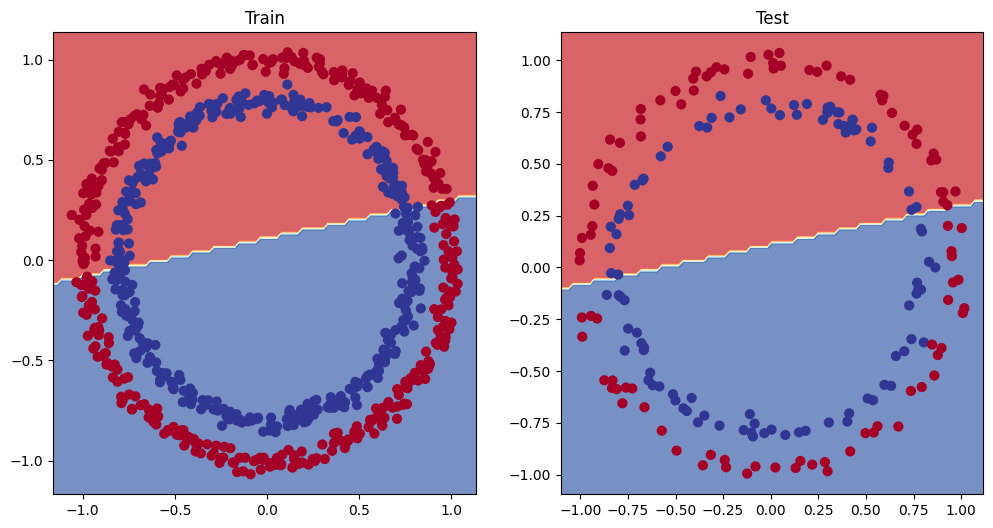

In [120]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [121]:
with open("helper_functions.py", "r") as file:
    content = file.read()
    print(content)


"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
    dir_path (str): target directory

    Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decis

# 5. IMPROVING A MODEL (FROM A MODEL PERSPECTIVE)
.add more layer- give the model more chances to learn about patterns in the data
.Add more hidden units- go from 5 hidden units to 10 hidden units.
.Fit for longer
.Change the learning rate
.Change the loss function
these options are all from a model perspective because they deal directly with the model,rather than the data
And because these options are all values we (as machine learning engineers and data scientists) can  change, they are referred as hyperparameters

let try and improve our model by:
* Adding hiddin units: 5->10
*Increase the number of layers:2->3
*Increase the nuumber pf epochs: 100->100


In [122]:
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, X):
        return self.layer_3(self.layer_2(self.layer_1(X)))  # this way of writing operations leverages speed-ups where possible behind the scenes

model_1 = CircleModelv1().to(device)
model_1


CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [123]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [124]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

# Set the random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Train for more epochs
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()  # Set model to training mode
    
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # Logits -> Probabilities -> Predictions
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. Zero gradients
    optimizer.zero_grad()
    
    # 4. Backward pass (backpropagation)
    loss.backward()
    
    # 5. Update parameters (gradient descent)
    optimizer.step()
    
    ### Testing (evaluation)
    model_1.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))  # Corrected this line
        
        # 2. Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69369, Acc: 50.25% | Test Loss: 0.69269, Test Acc: 50.00%
Epoch: 200 | Loss: 0.69351, Acc: 50.12% | Test Loss: 0.69282, Test Acc: 49.50%
Epoch: 300 | Loss: 0.69339, Acc: 50.50% | Test Loss: 0.69295, Test Acc: 49.00%
Epoch: 400 | Loss: 0.69329, Acc: 50.38% | Test Loss: 0.69309, Test Acc: 48.50%
Epoch: 500 | Loss: 0.69322, Acc: 49.88% | Test Loss: 0.69322, Test Acc: 49.50%
Epoch: 600 | Loss: 0.69317, Acc: 49.50% | Test Loss: 0.69335, Test Acc: 53.00%
Epoch: 700 | Loss: 0.69313, Acc: 49.38% | Test Loss: 0.69347, Test Acc: 50.50%
Epoch: 800 | Loss: 0.69309, Acc: 50.00% | Test Loss: 0.69358, Test Acc: 51.00%
Epoch: 900 | Loss: 0.69307, Acc: 50.62% | Test Loss: 0.69368, Test Acc: 47.50%


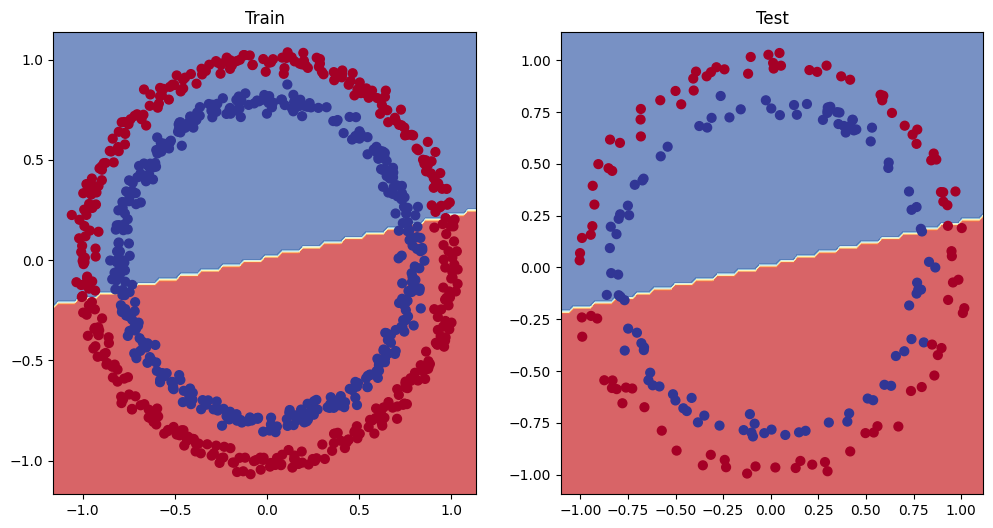

In [125]:
# plot the decision boundary 
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 preparing data to see if our model can fit a straight line
One way to trubleshoot to a longer problem is to test out a smaller pronlem

In [126]:
# create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data 
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula (without epsilon)

# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [127]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

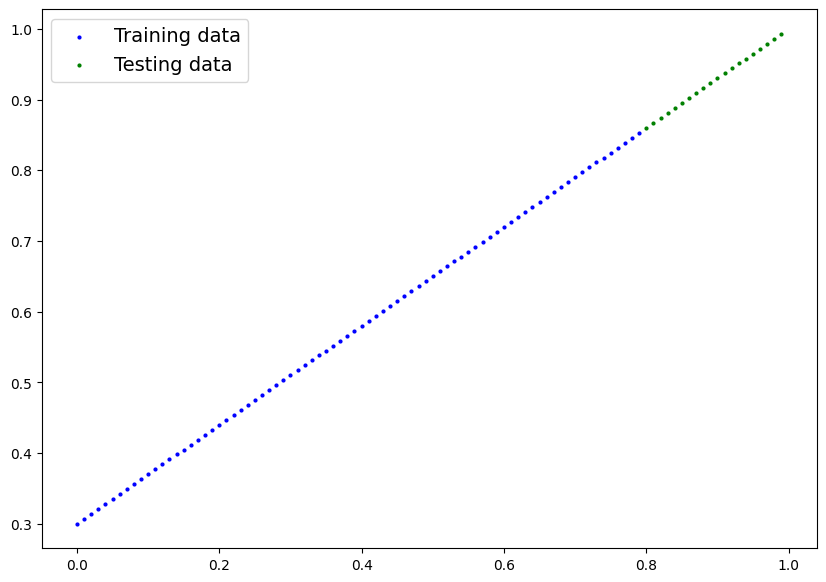

In [128]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)


5.2 Adjusting model_1 to fit a straight line

In [129]:
# same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [130]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)



In [131]:
# Set the random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training loop
for epoch in range(epochs):
    model_2.train()  # Set model to training mode
    y_pred = model_2(X_train_regression)  # Forward pass
    
    # Compute the loss
    loss = loss_fn(y_pred, y_train_regression)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Testing
    model_2.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    # Print out progress
    if epoch % 100 == 0:  # Print every 100 epochs
        print(f"Epoch: {epoch} | Loss: {loss.item():.5f} | Test Loss: {test_loss.item():.5f}")
        
        
        

    

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Loss: 0.05600 | Test Loss: 0.01425
Epoch: 900 | Loss: 0.05571 | Test Loss: 0.00603


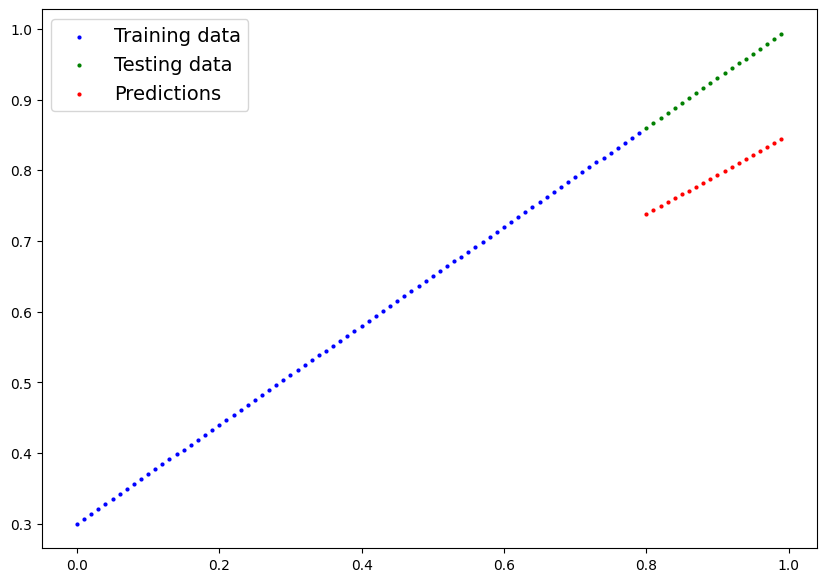

In [132]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

    # Ensure predictions are in the correct shape
    y_preds = y_preds.squeeze()  # Remove extra dimensions if necessary

    # Plot data and predictions
    plot_predictions(
        train_data=X_train_regression.cpu(),  # Use training data
        train_labels=y_train_regression.cpu(),  # Use training labels
        test_data=X_test_regression.cpu(),  # Use testing data
        test_labels=y_test_regression.cpu(),  # Use testing labels
        predictions=y_preds.cpu()
    )


### 6. THE MISSING PIECE: NON-LINEARITY
Wg=hat patterns could you drew if were given an infinte amount of a straight and non-straight lines? 
or in Machine Learning terms, an infinite(but really it is finite)
of linear and non-linear function


(<matplotlib.collections.PathCollection at 0x239d31ae220>,)

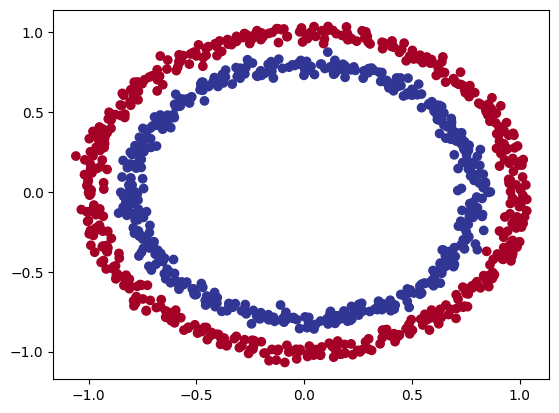

In [133]:
# make and plot data
import matplotlib.pyplot as plt  # Correct import
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles (n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu),

In [134]:
import torch
from sklearn.model_selection import train_test_split
import numpy as np

# Ensure X and y are NumPy arrays before converting to tensors
X = np.array(X) if not isinstance(X, np.ndarray) else X
y = np.array(y) if not isinstance(y, np.ndarray) else y

# Turn data into tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]




(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non-linearity
* LINEAR = STRAIGT LINES
* NON-LINEAR = NON-STAIGHT LINES 

Artifical neural networks are a large combination of linear(straight) and non-straight(non-linear) function which are potentially able to find patterns in data


In [135]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Define layers
        self.layer_1 = nn.Linear(in_features=2, out_features=10)  # Input layer
        self.layer_2 = nn.Linear(in_features=10, out_features=10)  # Hidden layer 1
        self.layer_3 = nn.Linear(in_features=10, out_features=1)  # Output layer
        self.relu = nn.ReLU()  # Non-linear activation function

    def forward(self, X):
        # Forward pass with non-linear activation functions
        X = self.relu(self.layer_1(X))  # Apply ReLU after layer 1
        X = self.relu(self.layer_2(X))  # Apply ReLU after layer 2
        return self.layer_3(X)  # No activation on the output layer

# Instantiate the model and move it to the device
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### 6.3 Training a model with non-linearity


In [136]:
# Random seeds
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_3.train()
    
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()  # Get logits and remove extra dimensions
    y_pred = torch.round(torch.sigmoid(y_logits))  # Logits -> prediction probabilities -> labels

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()  # Get logits and remove extra dimensions
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    # Print out progress
    if epoch % 100 == 0:  # Print every 100 epochs
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 100 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 200 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 300 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 400 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 500 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 600 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 700 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 800 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%
Epoch: 900 | Loss: 0.4994, Acc: 50.00% | Test Loss: 0.5001, Test Acc: 50.00%


### 6.4 EVELUATING A MODEL TRAINED WITH NON-LINEAR ACTIVATION FUNCTIONS

In [137]:
# MAKES PREDUCTIONS
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]
    

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

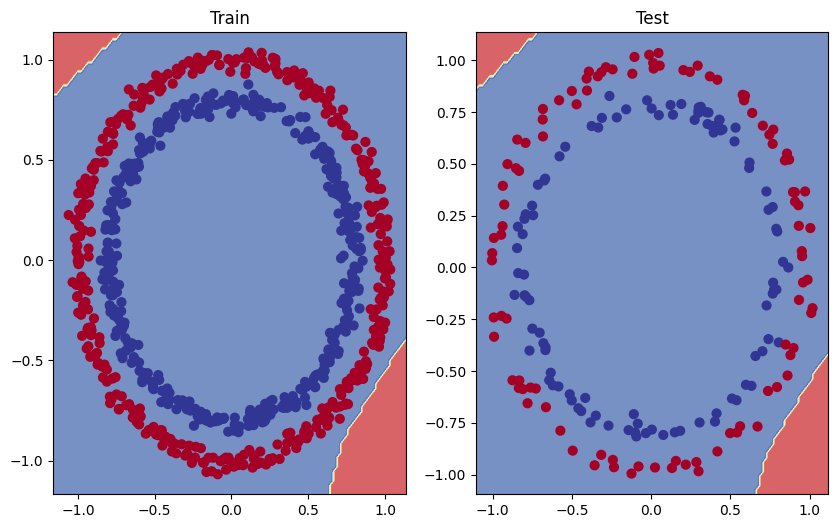

In [138]:
# plot decision boundaries
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3,  X_train, y_train) # model_1 non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity




### 7. Replicating non-linear activation function
### Neural network, rather than us telling the model what to learn, we give it the tools to discover 
# patterns in data and it tries to figure out the patterns on its own. and these are linear and non-linear functions.


In [139]:
# create a tensor

A = torch.arange(-10, 10, 1, dtype=torch.float32) 
A.dtype


torch.float32

In [140]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

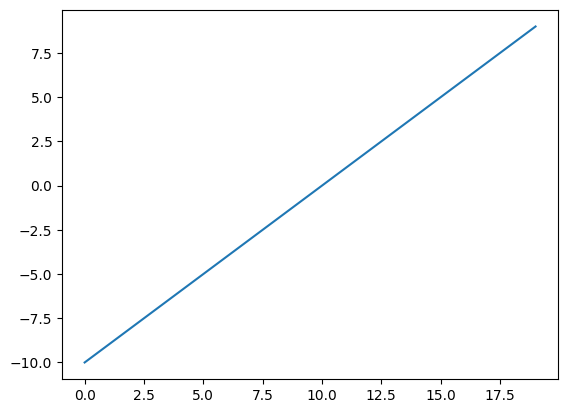

In [141]:
# Visualize the tensor
plt.plot(A);

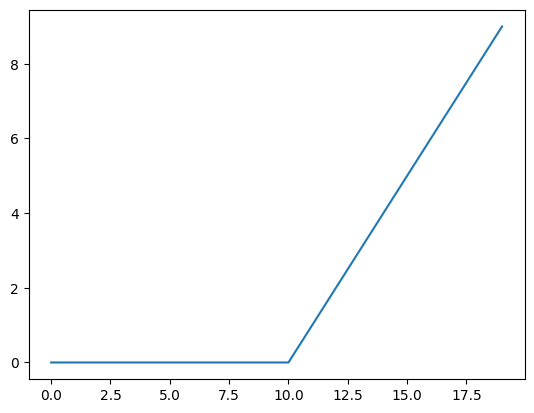

In [142]:
plt.plot(torch.relu(A))

In [143]:
def relu(X: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), X) # inputs must be tensors 
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

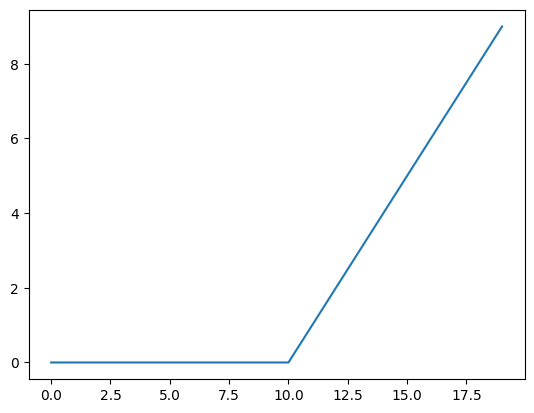

In [144]:
# plot Relu activation function 
plt.plot(relu(A)) 

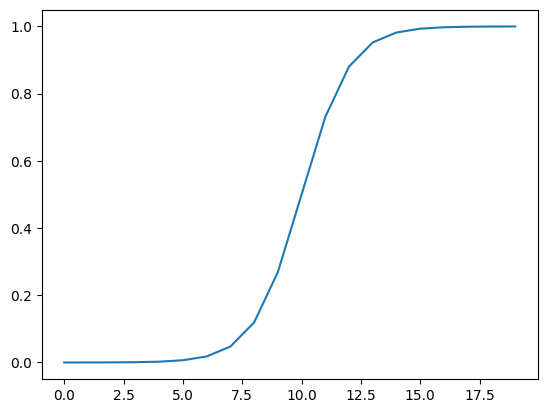

In [145]:
# now let do the same for sigmoid 
def sigmoid(X):
    return 1/(1 + torch.exp(-X))

plt.plot(torch.sigmoid(A));

  ### putting it all together with a multi-class classification problem
  . Binary Classification = one thing or another (cat vs dog, spam vs. not spam, fraud or not fraud)
  . Multi-class classification = more than one thing or another ( cat vs. dog vs. chicken)

### CREATING A TOY MULTI-CLASS DATASET

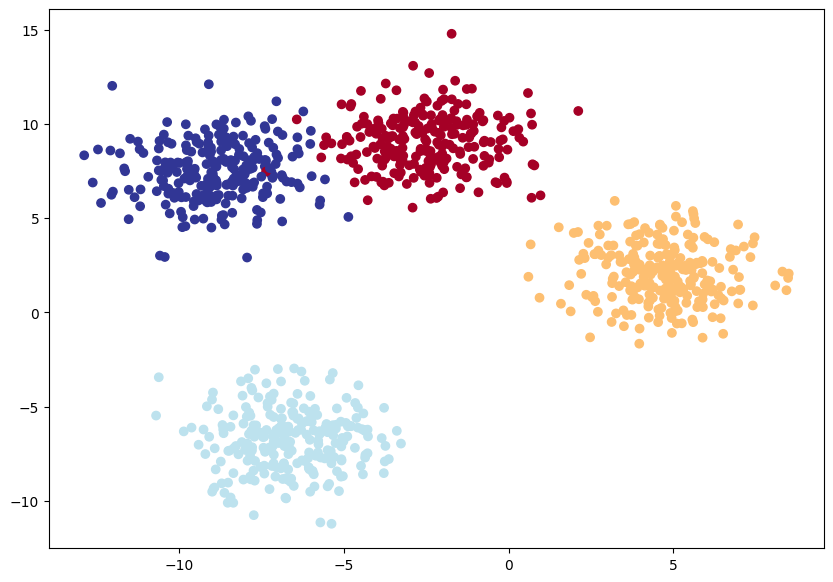

In [146]:
# IMPORT DEPENDENCIES 
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2 
RANDOM_SEED = 42

# 1. CREAT MULTI-CLASS DATA
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,# give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split( X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4.1 plot data (VISUALIZE, VISUALIZE, VISUALIZE)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)  # Corrected line
plt.show()

### 8.2 a multi-class clissification in pytorch


In [147]:
# create device agnostice code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [148]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(  # Fixed typo: "leaner_layer_stack" -> "linear_layer_stack"
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    # REQUIRED: Add forward method
    def forward(self, x):
        return self.linear_layer_stack(x)

# Instantiate the model
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [149]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [150]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

8.3 Create a loss function  and optimizer for a multi-class classification model

In [151]:
# Create a loss function for multi-class classification - loss function measure how wrong our model predictions are 
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # Learning rate is hyperparameter you can change


8.4 Getting prediction probabilities for a multi-class pytorch model
In order to evaluate and train and test our, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels
logigs (raw output of the model)-> pred probs(use torch.softmax) -> pred labels

In [152]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [153]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [154]:
# convert our model's logit output to prediction probilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [155]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [156]:
torch.argmax(y_pred_probs[0])

tensor(3)

In [157]:
# convert   our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [158]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [159]:
# 8.5 CREATING A TRAINING LOOP AND TESTING LOOP FOR A MULTI-CLASS PYTORCH MODEL

In [160]:
# FIT the multi-class model to the data 
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put all data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)  # Fixed variable name
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)      # Fixed variable name

# Initialize loss function and optimizer
loss_fn = nn.CrossEntropyLoss()  # CrossEntropyLoss works with raw logits
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)  # Added optimizer

# Training loop
for epoch in range(epochs):
    ### Training
    model_4.train()
    
    # Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    # Calculate loss/accuracy
    loss = loss_fn(y_logits, y_blob_train.type(torch.long))  # Ensure correct dtype
    acc = accuracy_fn(y_true=y_blob_train,
                     y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    
    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test.type(torch.long))
        test_acc = accuracy_fn(y_true=y_blob_test,
                              y_pred=test_pred)  # Fixed variable (was y_pred)
    
    # Print metrics
    if epoch % 100 == 0:  # Changed to every 100 epochs for less verbose output
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.0432, Acc: 65.50% | Test loss: 0.5786, Test acc: 95.50%
Epoch: 100 | Loss: 0.0318, Acc: 99.12% | Test loss: 0.0229, Test acc: 99.50%
Epoch: 200 | Loss: 0.0271, Acc: 99.12% | Test loss: 0.0170, Test acc: 99.50%
Epoch: 300 | Loss: 0.0256, Acc: 99.25% | Test loss: 0.0150, Test acc: 99.50%
Epoch: 400 | Loss: 0.0249, Acc: 99.25% | Test loss: 0.0139, Test acc: 99.50%
Epoch: 500 | Loss: 0.0244, Acc: 99.25% | Test loss: 0.0132, Test acc: 99.50%
Epoch: 600 | Loss: 0.0241, Acc: 99.25% | Test loss: 0.0127, Test acc: 99.50%
Epoch: 700 | Loss: 0.0238, Acc: 99.25% | Test loss: 0.0122, Test acc: 99.50%
Epoch: 800 | Loss: 0.0235, Acc: 99.25% | Test loss: 0.0119, Test acc: 99.50%
Epoch: 900 | Loss: 0.0232, Acc: 99.25% | Test loss: 0.0116, Test acc: 99.50%


8.6 MAKING AND EVALUATING PREDICTIONS WITH A PYTORCH MULTI-CLASS MODEL

In [161]:
# MAKE PREDICTIONS
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  
# view the first prediction 
y_logits[:10]

tensor([[  6.1117,  18.9106, -22.9633, -14.6996],
        [  9.5663, -23.8503,   5.8413,  17.7027],
        [ -8.4024, -21.8531,  30.5468,  17.0858],
        [  2.1340,  14.6655, -13.7829, -11.2653],
        [ 13.2141,   3.9343, -21.4953,  -3.6479],
        [ 10.8393, -29.6209,   8.5482,  22.0347],
        [ -9.3843, -15.7081,  27.1176,  12.4539],
        [ 11.9276,  -3.3287, -13.8623,   1.9500],
        [ -7.8685, -31.8188,  37.6567,  24.6510],
        [ 12.1833,  -0.6223, -16.3793,  -0.1247]])

In [162]:
# go from logits -. prediction probabilities 
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]



tensor([[2.7636e-06, 1.0000e+00, 6.5217e-19, 2.5309e-15],
        [2.9262e-04, 8.9872e-19, 7.0557e-06, 9.9970e-01],
        [1.2149e-17, 1.7499e-23, 1.0000e+00, 1.4254e-06],
        [3.6110e-06, 1.0000e+00, 4.4157e-13, 5.4754e-12],
        [9.9991e-01, 9.3280e-05, 8.4300e-16, 4.7520e-08],
        [1.3737e-05, 3.6835e-23, 1.3896e-06, 9.9998e-01],
        [1.4043e-16, 2.5179e-19, 1.0000e+00, 4.2819e-07],
        [9.9995e-01, 2.3675e-07, 6.3036e-12, 4.6426e-05],
        [1.6931e-20, 6.7173e-31, 1.0000e+00, 2.2476e-06],
        [9.9999e-01, 2.7454e-06, 3.9396e-13, 4.5158e-06]])

In [163]:
# go from pred probs to pred labels 
y_pred = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3])

In [164]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

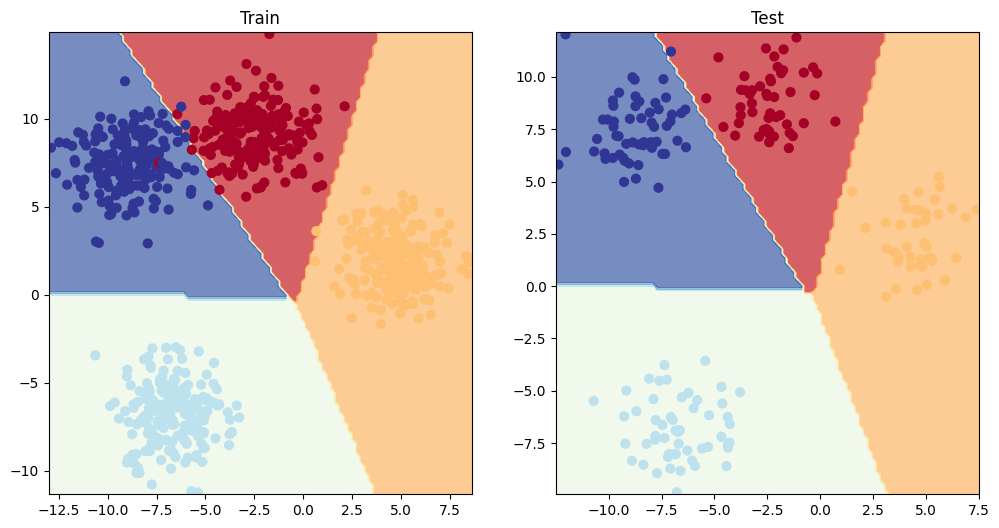

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# First subplot (Train data)
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

# Second subplot (Test data)
plt.subplot(1, 2, 2)  # This was missing
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

plt.show()  # Ensure the plots are displayed



9. A few more classification metrics.. (to evaluate our classification model)

# Accuracy - out of 100 samples, how many does our model get right
# Precision
# Recall
# F1-score
# Confusion matrix
# Classsification report
# see this article for when  to use precision/recall
# if you want acess to a lot of pytorch metrics, see torchmetrics-

# https://lightning.ai/docs/torchmetrics/stable/all-metrics.html

In [176]:
from torchmetrics import Accuracy

# Setup metric (specify task and num_classes for multi-class)
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)  # Key fix

# Calculate accuracy (ensure predictions are class labels, not logits)
torchmetric_accuracy(y_pred.to(device), y_blob_test.to(device))  # Ensure device consistency


 
 

tensor(0.9950)